In [1]:
!pip install tensorflow

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
from ultralytics import YOLO

# Cek versi
import ultralytics
ultralytics.checks()

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [4]:
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochyusufhaidar","key":"9529559981a140f13f52dae33420641e"}'}

In [5]:
# Buat folder dan copy token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d mochyusufhaidar/dataset-sampah

# Ekstrak
!unzip -q dataset-sampah.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/mochyusufhaidar/dataset-sampah
License(s): unknown
 90% 589M/654M [00:03<00:01, 58.7MB/s]
100% 654M/654M [00:03<00:00, 188MB/s] 


In [6]:
dataset_path = "/content/dataset/balanced_dataset"

In [7]:
import os
print(os.listdir(dataset_path))

['metal', 'clothes', 'glass', 'cardboard', 'trash', 'shoes', 'battery', 'paper', 'biological', 'plastic']


In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')
model.train(
    data='/content/dataset/balanced_dataset',
    epochs=20,
    imgsz=224,
    name='train_balanced'
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 162MB/s]


Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/balanced_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_balanced, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 5.35M/5.35M [00:00<00:00, 150MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1229.0±717.0 MB/s, size: 54.6 KB)


train: Scanning /content/dataset/balanced_dataset_split/train... 7200 images, 0 corrupt: 100%|██████████| 7200/7200 [00:01<00:00, 5626.99it/s]

train: New cache created: /content/dataset/balanced_dataset_split/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 901.2±425.4 MB/s, size: 64.8 KB)


val: Scanning /content/dataset/balanced_dataset_split/val... 1800 images, 0 corrupt: 100%|██████████| 1800/1800 [00:00<00:00, 1968.53it/s]

val: New cache created: /content/dataset/balanced_dataset_split/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train_balanced
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      0.27G      2.415         16        224:   2%|▏         | 7/450 [00:01<01:09,  6.35it/s]

       1/20      0.27G        2.4         16        224:   2%|▏         | 10/450 [00:02<01:07,  6.53it/s]
100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.07it/s]

                   all       0.85      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.10it/s]

                   all      0.888      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.13it/s]

                   all      0.907      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.08it/s]

                   all      0.905      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.20it/s]

                   all      0.901      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.19it/s]

                   all      0.916      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.25it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.21it/s]

                   all      0.933      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.27it/s]

                   all      0.929      0.998



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.348G     0.2373         16        224: 100%|██████████| 450/450 [01:06<00:00,  6.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.22it/s]

                   all      0.931      0.998



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.355G      0.208         16        224: 100%|██████████| 450/450 [01:10<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:12<00:00,  4.57it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.363G     0.1941         16        224: 100%|██████████| 450/450 [01:08<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.32it/s]

                   all      0.934      0.999



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.371G     0.1738         16        224: 100%|██████████| 450/450 [01:06<00:00,  6.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.02it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.381G      0.161         16        224: 100%|██████████| 450/450 [01:11<00:00,  6.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.59it/s]

                   all      0.946      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.389G     0.1526         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.39it/s]

                   all      0.944      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.396G     0.1528         16        224: 100%|██████████| 450/450 [01:06<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.02it/s]

                   all      0.947      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.404G     0.1505         16        224: 100%|██████████| 450/450 [01:06<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.30it/s]

                   all      0.937      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.412G     0.1287         16        224: 100%|██████████| 450/450 [01:09<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.09it/s]

                   all      0.945      0.999



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.422G     0.1164         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.30it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20      0.43G     0.1263         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.35it/s]

                   all      0.944      0.999



20 epochs completed in 0.438 hours.
Optimizer stripped from runs/classify/train_balanced/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train_balanced/weights/best.pt, 3.0MB

Validating runs/classify/train_balanced/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/dataset/balanced_dataset/train
Found 9000 images in subdirectories. Attempting to split...
Splitting /content/dataset/balanced_dataset (10 classes, 9000 images) into 80% train, 20% val...
Split complete in /content/dataset/balanced_dataset_split ✅
train: /content/dataset/balanced_dataset_split/train... found 8643 images in 10 classes ✅ 
val: /content/dataset/balanced_dataset_split/val... found 3243 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:09<00:00,  5.95it/s]


                   all      0.947          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train_balanced


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bce9c181dd0>
curves: []
curves_results: []
fitness: 0.9736111164093018
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9472222328186035, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9736111164093018}
save_dir: PosixPath('runs/classify/train_balanced')
speed: {'preprocess': 0.08065559000013107, 'inference': 0.3156902083328027, 'loss': 0.0004298083344009582, 'postprocess': 0.0006518455552395608}
task: 'classify'
top1: 0.9472222328186035
top5: 1.0

Saving images.jpg to images.jpg

image 1/1 /content/images.jpg: 224x224 paper 0.66, trash 0.21, cardboard 0.13, battery 0.00, shoes 0.00, 4.6ms
Speed: 14.1ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


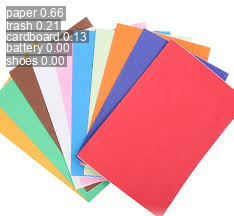

Probabilitas tiap kelas:
battery: 0.00
biological: 0.00
cardboard: 0.13
clothes: 0.00
glass: 0.00
metal: 0.00
paper: 0.66
plastic: 0.00
shoes: 0.00
trash: 0.21

Prediksi utama: paper (65.57%)


In [9]:
from google.colab import files
from ultralytics import YOLO

# Upload gambar
uploaded = files.upload()

# Ambil path gambar
for filename in uploaded.keys():
    image_path = filename

# Load model
model = YOLO('runs/classify/train_balanced/weights/best.pt')

# Prediksi gambar
results = model(image_path)

# Tampilkan hasil prediksi
results[0].show()  # akses elemen pertama dari list dan tampilkan hasil prediksi

# Tampilkan probabilitas tiap kelas
print("Probabilitas tiap kelas:")
for i, prob in enumerate(results[0].probs.data.tolist()):
    class_name = results[0].names[i]
    print(f"{class_name}: {prob:.2f}")

# Tampilkan kelas prediksi teratas
top_idx = results[0].probs.top1
top_name = results[0].names[top_idx]
top_prob = results[0].probs.data[top_idx]
print(f"\nPrediksi utama: {top_name} ({top_prob * 100:.2f}%)")

In [10]:
model = YOLO('runs/classify/train_balanced/weights/best.pt')  # load model terbaik
model.save('my_final_model.pt')  # simpan ulang dengan nama yang kamu inginkan

In [11]:
model.export(format='tflite')   # untuk TensorFlow Lite (.tflite)
model.export(format='tfjs')     # untuk TensorFlow.js (.json + bin files)

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from 'runs/classify/train_balanced/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 10) (2.8 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<1.18.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 10.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.18.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 43.5MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 46.84file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 0.7s, saved as 'runs/classify/train_balanced/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.10...
Saved artifact at 'runs/classify/train_balanced/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 224, 224, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 10), dtype=tf.float32, name=None)
Captures:
  136127495617424: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  136127495615888: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  136127495617808: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  136127477894800: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  136127477894416: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  136127477895376: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  136127477892112: TensorS


TensorFlow.js: starting export with tensorflowjs 4.22.0...

TensorFlow.js: output node names: Identity:0
TensorFlow.js: running 'tensorflowjs_converter --input_format=tf_frozen_model  --output_node_names=Identity:0 "runs/classify/train_balanced/weights/best.pb" "runs/classify/train_balanced/weights/best_web_model"'
TensorFlow.js: export success ✅ 5.5s, saved as 'runs/classify/train_balanced/weights/best_web_model' (5.6 MB)

Export complete (12.9s)
Results saved to /content/runs/classify/train_balanced/weights
Predict:         yolo predict task=classify model=runs/classify/train_balanced/weights/best_web_model imgsz=224  
Validate:        yolo val task=classify model=runs/classify/train_balanced/weights/best_web_model imgsz=224 data=/content/dataset/balanced_dataset  
Visualize:       https://netron.app


'runs/classify/train_balanced/weights/best_web_model'